# AutoPipeline

Como ocurría con la librería *Transformers*, *Diffusers* proporciona pipelines para inferencia, fácilmente configurables. A veces, la elección del pipeline adecuado para una aplicación y un checkpoint de un modelo determinado, puede no ser trivial. La familia de clases *AutoPipeline* simplifica dicha elección. Nuestra elección se limita a llamar a la clase AutoPipeline de la tarea concreta que queremos realizar. Esta clase selecciona la clase pipeline concreta que tenemos que utilizar. 

Como ejemplo, vamos a utilizar un checkpoint de un modelo [dreamlike-art/dreamlike-photoreal-2.0](https://hf.co/dreamlike-art/dreamlike-photoreal-2.0). El uso de AutoPipeline:

1. Detectará la clase *stable-diffusion* dentro del fichero *model_index.json* del modelo.
2. Dependiendo de la tarea que queremos realizar con el modelo podrá cargar distintas versiones del modelo StableDiffusion: StableDiffusionPipeline, StableDiffusionImg2ImgPipeline o StableDiffusionInpaintPipeline. 

Por ejemplo text2img:

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

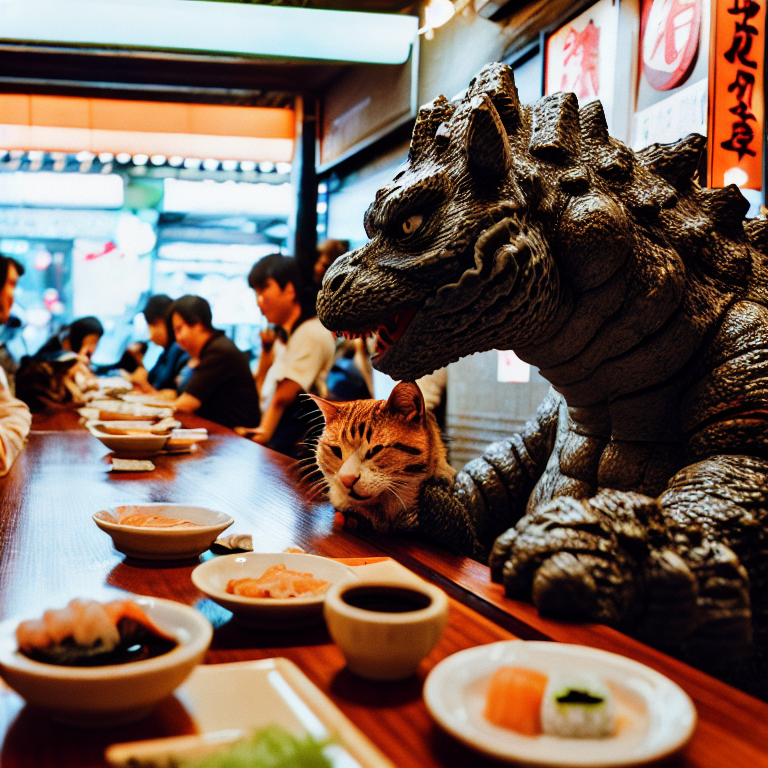

In [3]:
from diffusers import AutoPipelineForText2Image
import torch

pipe_txt2img = AutoPipelineForText2Image.from_pretrained(
    "dreamlike-art/dreamlike-photoreal-2.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

prompt = "cinematic photo of Godzilla eating sushi with a cat in a izakaya, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator(device="cpu").manual_seed(37)
image = pipe_txt2img(prompt, generator=generator).images[0]
image

Vemos que el código utiliza el AutoPipeline correspondiente a la tarea Tex2Img. Probemos ahora a hacer lo mismo pero con la tarea image-to-image y luego con la tarea inpainting.

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

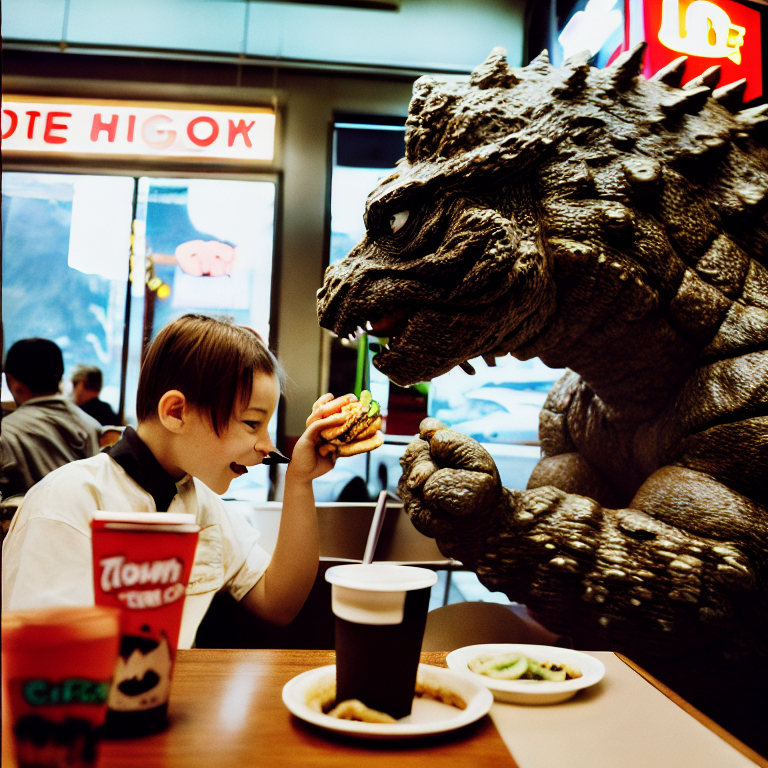

In [5]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

pipe_img2img = AutoPipelineForImage2Image.from_pretrained(
    "dreamlike-art/dreamlike-photoreal-2.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-text2img.png")

prompt = "cinematic photo of Godzilla eating burgers with a cat in a fast food restaurant, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator(device="cpu").manual_seed(53)
image = pipe_img2img(prompt, image=init_image, generator=generator).images[0]
image

In [6]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipeline = AutoPipelineForInpainting.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-img2img.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/autopipeline-mask.png")

prompt = "cinematic photo of a owl, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator(device="cpu").manual_seed(38)
image = pipeline(prompt, image=init_image, mask_image=mask_image, generator=generator, strength=0.4).images[0]
image

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

OSError: [Errno 122] Disk quota exceeded

El AutoPipeline admite los puntos de control de Stable Diffusion, Stable Diffusion XL, ControlNet, Kandinsky 2.1, Kandinsky 2.2 y DeepFloyd IF.

Si intentas cargar un punto de control no compatible, recibirás un error.